# Interview Practice
https://techiedelight.quora.com/Top-Algorithms-Data-Structures-Concepts-every-computer-science-student-should-know

In [144]:
from time import clock
from numpy import random as nprnd
from matplotlib import pyplot as plt
from math import log
#import matplotlib.pyplot as plt

## Sorting

In [103]:
def check_sort(function):
    """Inputs:
function: A sorting algorithm pass in as a parameter (without '()')

Outputs: Returns a string containing test status (Pass/Fail)
"""
    nprnd.seed(500)
    unsorted = nprnd.randint(10000, size=1000).tolist()
    try:
        assert function(unsorted) == sorted(unsorted)
    except:
        return 'Test Failed'
    return 'Test Passed'

In [380]:
def check_complexity(function, sort='unsorted'):
    """Inputs:
function: A sorting function passed in as a parameter (without '()')
sort: A string from ['ascending', 'descending', other] to test the sorting
algorithm's complexity in that case. Defaults to unsorted.

Outputs: Returns a string of the computed time complexity
"""
    nsquared_weighted_average_list = [] # holds the moving weighted average 
    nlogn_weighted_average_list = []
    n_weighted_average_list = []
    array_size = 100
    x = []
    y = []
    while array_size < 1000:
        nprnd.seed(500)
        array = nprnd.randint(10000, size=array_size).tolist()
        if sort == 'ascending':
            array = sorted(array)
        elif sort == 'descending':
            array = sorted(array, reverse=True)
        start_time = clock()
        function(array)
        end_time = clock()
        time = end_time - start_time
        nsquared = time / (array_size * array_size)
        nlogn = time / (array_size * log(array_size))
        n = time / array_size
        nsquared_weighted_average_list.append(nsquared)
        nlogn_weighted_average_list.append(nlogn)
        n_weighted_average_list.append(n)
        x.append(array_size)
        y.append(time)
        array_size += 100
    nsquared_average_change = ((max(nsquared_weighted_average_list)
                               - min(nsquared_weighted_average_list)) 
                               / (sum(nsquared_weighted_average_list)
                               / len(nsquared_weighted_average_list)))
    nlogn_average_change = ((max(nlogn_weighted_average_list)
                            - min(nlogn_weighted_average_list))
                            / (sum(nlogn_weighted_average_list)
                            / len(nlogn_weighted_average_list)))
    n_average_change = ((max(n_weighted_average_list)
                        - min(n_weighted_average_list))
                        / (sum(n_weighted_average_list)
                        / len(n_weighted_average_list)))
    complexity_dict = {nsquared_average_change: 'O(N^2)',
                      nlogn_average_change: 'O(NlogN)',
                      n_average_change: 'O(N)'}
    tempmin = min(y)
    tempmax = max(y)
    y = [(a-tempmin)/(tempmax-tempmin) for a in y]
    plt.plot(x,y, label='Data')
    #
    yN = [a for a in x]
    tempmin = min(yN)
    tempmax = max(yN)
    #yN = [a*(max(y)/maxyN) for a in x]
    yN = [(a-tempmin)/(tempmax-tempmin) for a in yN]# Normalize
    #
    yNlogN = [a*log(a) for a in x]
    tempmin = min(yNlogN)
    tempmax = max(yNlogN)
    #yNlogN = [a*(max(y)/tempmax) for a in x]
    yNlogN = [(a-tempmin)/(tempmax-tempmin) for a in yNlogN]# Normalize
    #
    yN2 = [a**2 for a in x]
    tempmin = min(yN2)
    tempmax = max(yN2)
    #yN2 = [a*(max(y)/tempmax) for a in x]
    yN2 = [(a-tempmin)/(tempmax-tempmin) for a in yN2]# Normalize
    #
    plt.plot(x, yN, label='N')
    plt.plot(x, yNlogN, label='NlogN')
    plt.plot(x, yN2, label='N^2')
    plt.xlabel("Iterations")
    plt.ylabel("Clock Time")
    plt.title('Normalized Big O Complexity')
    plt.legend()
    plt.show()
    return complexity_dict[min(complexity_dict)]

### Insertion Sort

In [4]:
def insertion(array):
    for i in range(1, len(array)): # from first to last element
        for j in range(i, 0, -1): # from ith to first element
            if array[j] < array[j-1]:
                temp = array[j]
                array[j] = array[j-1]
                array[j-1] = temp
            else:
                break
    return array

In [185]:
print(check_sort(insertion))

Test Succeeded


#### Average Case:

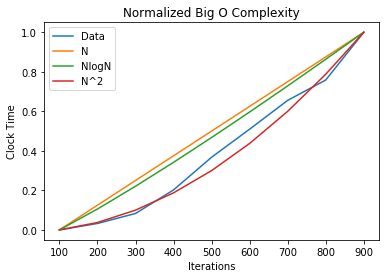

O(N^2)


In [381]:
print(check_complexity(insertion))

#### Best Case: 

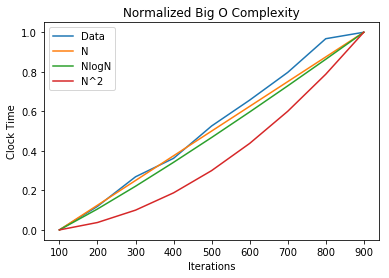

O(N)


In [382]:
print(check_complexity(insertion, 'ascending'))

#### Worst Case:

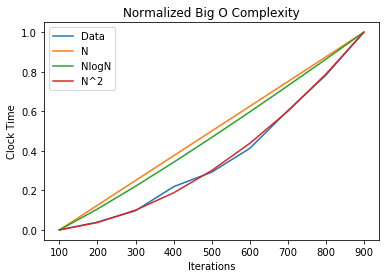

O(N^2)


In [383]:
print(check_complexity(insertion, 'descending'))

### Selection Sort

In [64]:
def selection(array):
    for i in range(0, len(array)): # from first to last element
        smallest_number = i
        for j in range(i + 1, len(array)): # from ith to last element
            if array[j] < array[smallest_number]:
                smallest_number = j
        temp = array[smallest_number]
        array[smallest_number] = array[i]
        array[i] = temp
    return array

In [83]:
print(check_sort(selection))

'Test Succeeded'

#### Average Case:

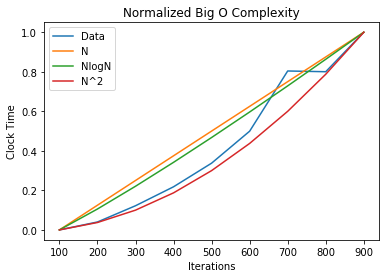

O(N^2)


In [388]:
print(check_complexity(selection))

#### Best Case:

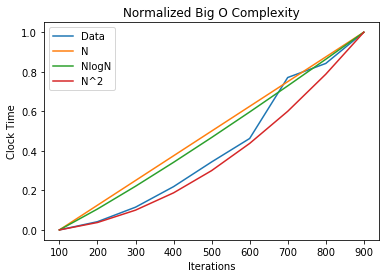

O(N^2)


In [389]:
print(check_complexity(selection, 'ascending'))

#### Worst Case:

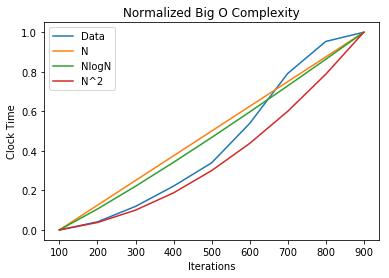

O(N^2)


In [390]:
print(check_complexity(selection, 'descending'))

### Bubble Sort

In [88]:
def bubble(array):
    for i in range(len(array) - 1, 0, -1): # from last to first element
        done = True
        for j in range(0, i): # from first to ith element
            if array[j] > array[j + 1]:
                done = False
                temp = array[j]
                array[j] = array[j + 1]
                array[j + 1] = temp
        if done:
            break
    return array

In [170]:
print(check_sort(bubble))

Test Succeeded


#### Average Case:

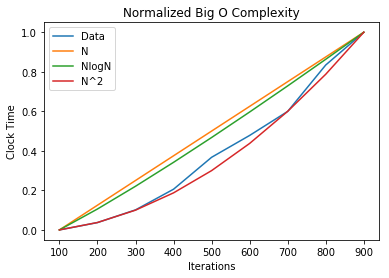

O(N^2)


In [391]:
print(check_complexity(bubble))

#### Best Case:

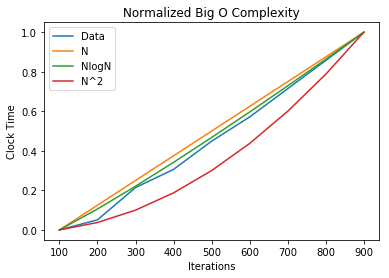

O(N)


In [392]:
print(check_complexity(bubble, 'ascending'))

#### Worst Case:

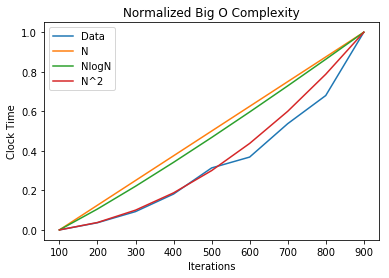

O(N^2)


In [393]:
print(check_complexity(bubble, 'descending'))

### Merge Sort

In [267]:
def merge_sort(array):
    if len(array) > 1: # base case: array is one element
        mid = len(array) // 2 # floor divide
        left = array[:mid]
        right = array[mid:]

        mergeSort(left)
        mergeSort(right)

        i = 0
        j = 0
        k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                array[k] = left[i]
                i += 1
            else:
                array[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            array[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            array[k] = right[j]
            j += 1
            k += 1
        return array

In [268]:
print(check_sort(merge_sort))

'Test Succeeded'

#### Average Case:

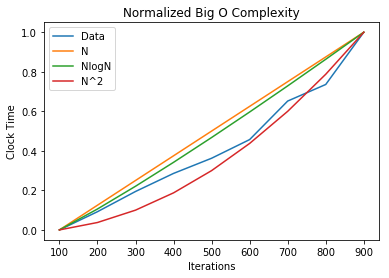

O(NlogN)


In [394]:
print(check_complexity(merge_sort))

#### Best Case:

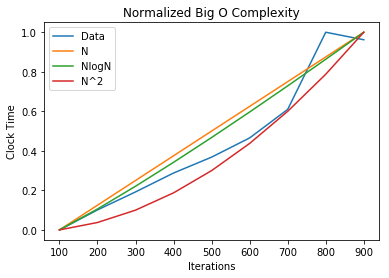

O(NlogN)


In [397]:
print(check_complexity(merge_sort, 'ascending'))

#### Worst Case:

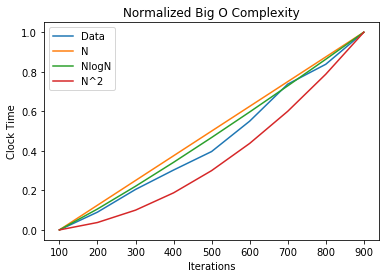

O(NlogN)


In [398]:
print(check_complexity(merge_sort, 'descending'))

### Quicksort

In [279]:
def quick_sort(array):
    less = []
    equal = []
    greater = []
    if len(array) > 1: # Base case: only one element in the array
        pivot = array[-1]
        for x in array:
            if x < pivot:
                less.append(x)
            if x == pivot:
                equal.append(x)
            if x > pivot:
                greater.append(x)
        return quick_sort(less) + equal + quick_sort(greater)  # Join the lists
    else:
        return array

In [281]:
print(check_sort(quick_sort))

'Test Succeeded'

#### Average Case:

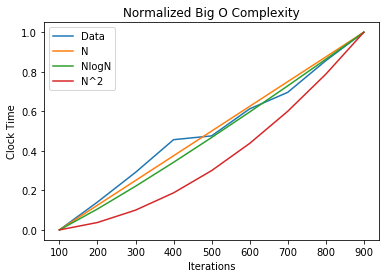

O(NlogN)


In [403]:
print(check_complexity(quick_sort))

#### Best Case:

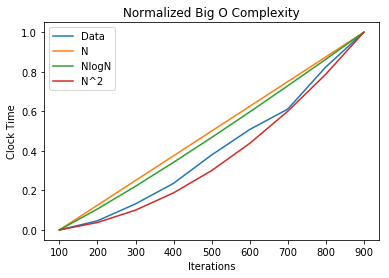

O(N^2)


In [417]:
print(check_complexity(quick_sort, 'ascending'))
# This should be O(NlogN)

#### Worst Case:

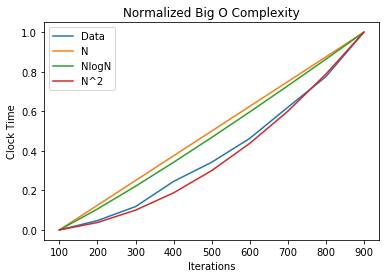

O(N^2)


In [418]:
print(check_complexity(quick_sort, 'descending'))

### Binary Search

### Breadth First Search (BFS)

### Depth First Search (DFS)

### Lee Algorithm

### Flood Fill Algorithm

### Floydâ€™s Cycle Detection Algorithm

### Quicksort

### Quicksort

### Quicksort